## libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

#connect the db
conn = sqlite3.connect('inventory.db')

#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,vendorNumber,vendorName,Brand,description,purchasePrice,actualPrice,volume,totalPurchaseQuantity,totalPurchaseDollars,totalSalesQuantity,totalSalesDollars,totalSalesPrice,totalExciseTax,freightCost,grossProfit,profitMargin,stockTurnover,salestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
purchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
actualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
totalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
totalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
totalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
totalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
totalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


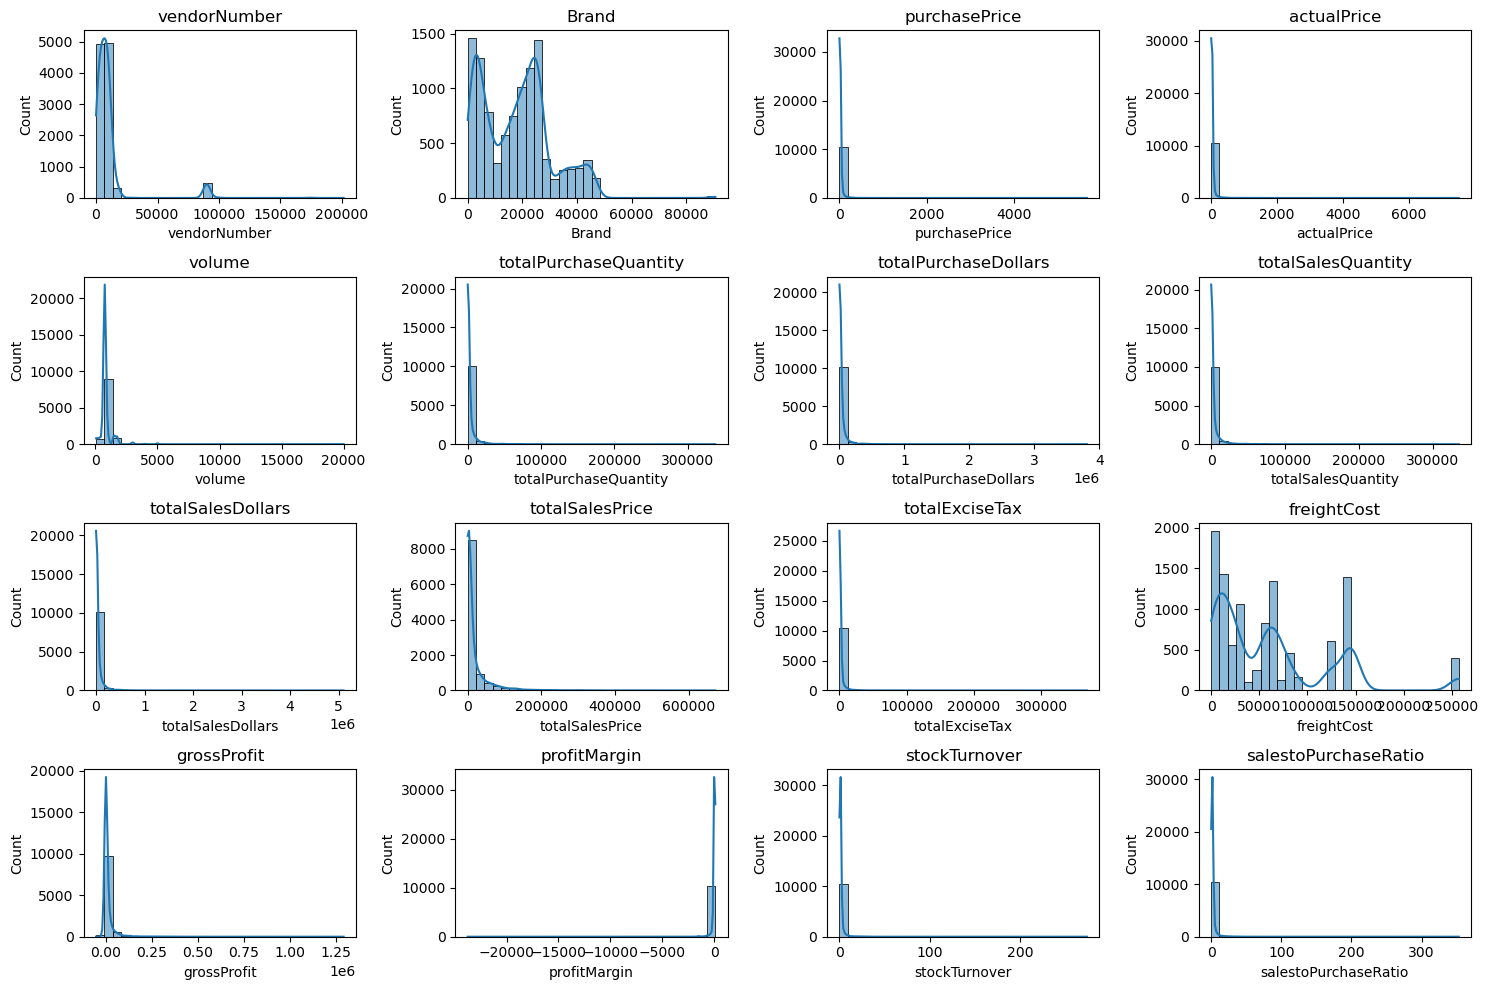

In [6]:
#distribution plots for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

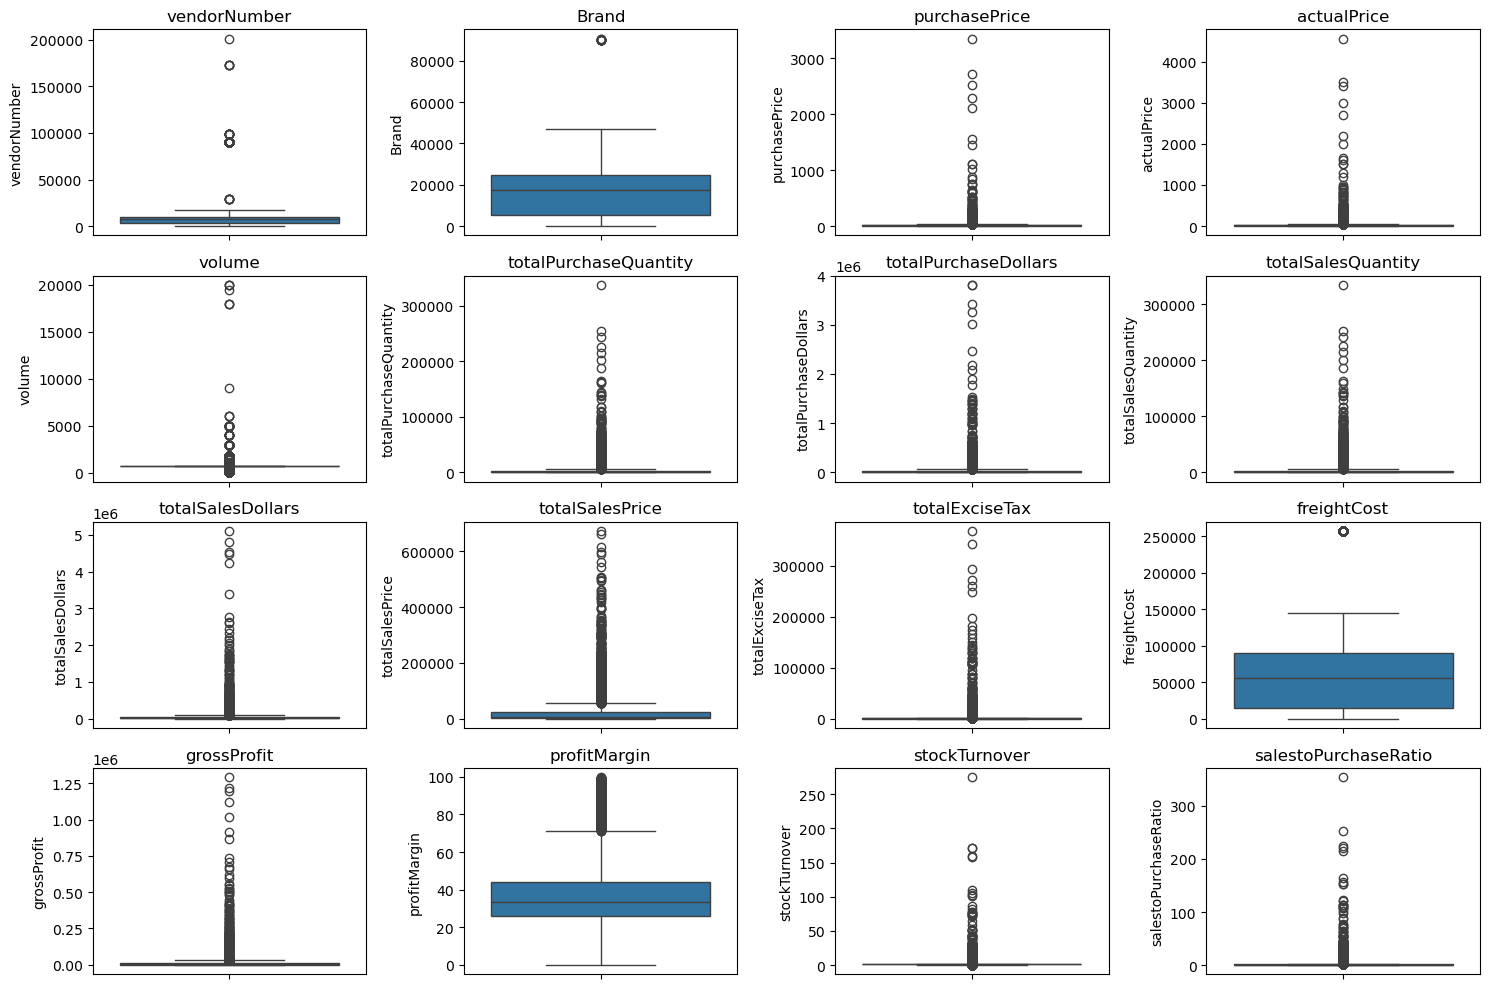

In [8]:
#finding outlier using boxplots
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# insights from the graph
gross profit: min value is -52000.78. which means loss. some products or transactions may be selling at a loss due to high cost of selling at disscounts lower than purchase price
profit margin: has a min of -inf, meaning there are cases where revenue is 0 or lower than costs
total sales quantity and sales dollars: min values are 0, meaning products never got sold

## outliers 
purchase and actual prices has max values significantly higher than their mean meaning potential premium product
freight cost has huge variations suggesting logistics inefficiencies or bulk shipments
stock turnover variations implying products sell extremely fast while others remain in stock indefinitely, value more than 1 means sold quantity is more than purchased quantity due to either sales are being fulfilled or being sold from older stocks




In [5]:
# removing incosistent datas
df = pd.read_sql_query("""select *
from vendor_sales_summary
where grossprofit > 0
and profitmargin >0
and totalsalesquantity > 0""",conn)

In [13]:
df

,vendorNumber,vendorName,Brand,description,purchasePrice,actualPrice,volume,totalPurchaseQuantity,totalPurchaseDollars,totalSalesQuantity,totalSalesDollars,totalSalesPrice,totalExciseTax,freightCost,grossProfit,profitMargin,stockTurnover,salestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


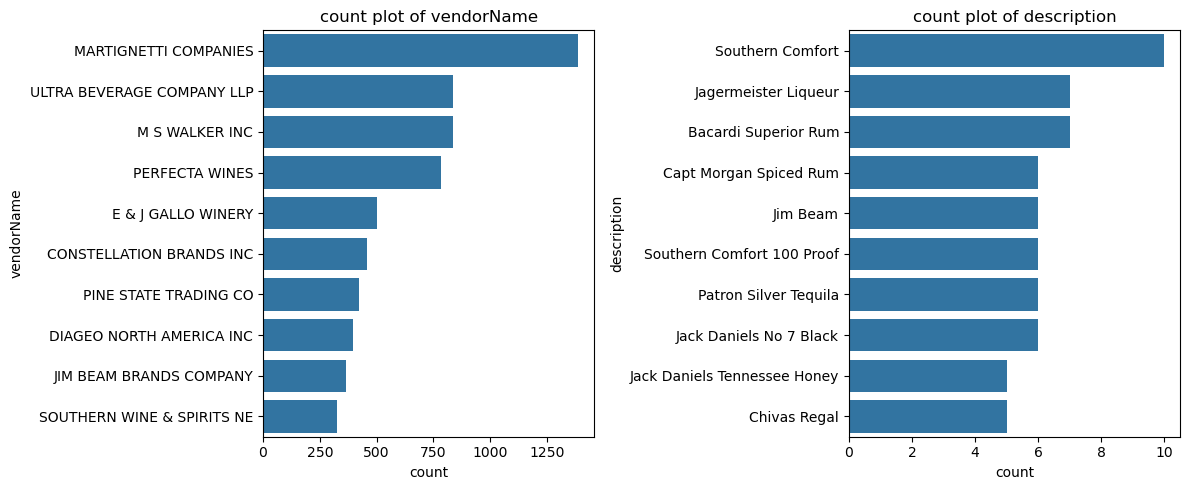

In [4]:
# count plots for categorical columns
categorical_cols = ['vendorName','description']

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])
    plt.title(f"count plot of {col}")
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

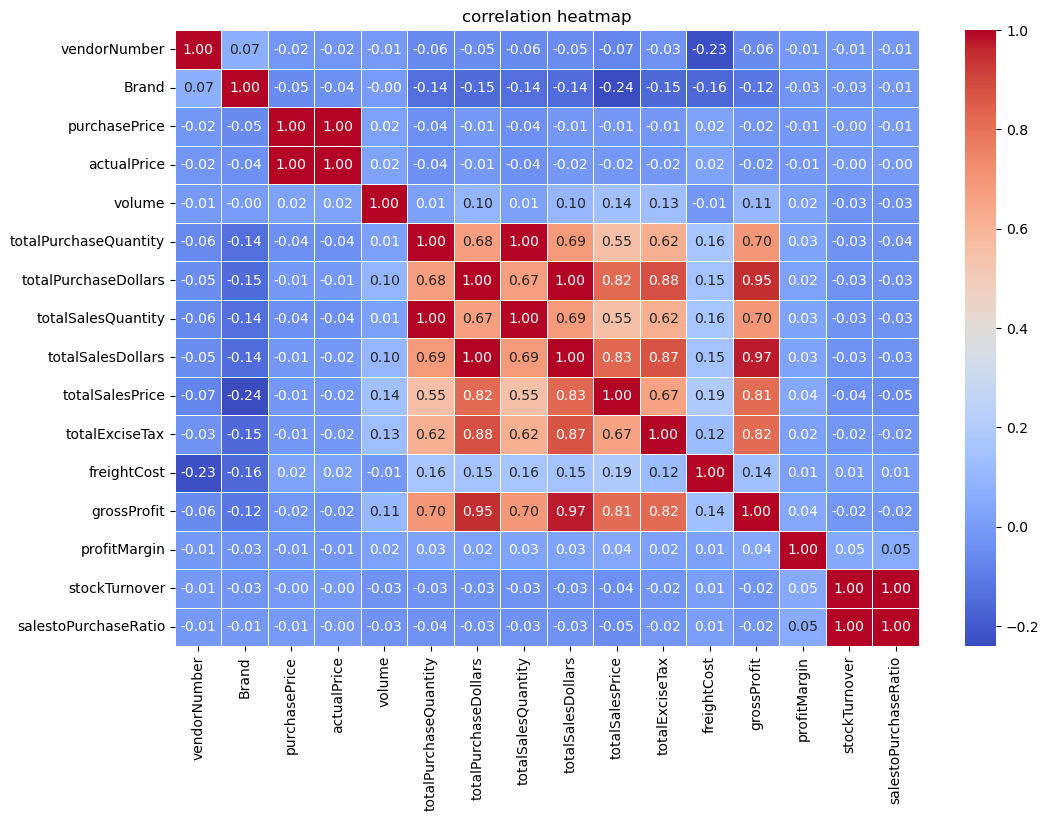

In [7]:
# correlation heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("correlation heatmap")
plt.show

# data Analysis
identify Brands that needs promotional or pricing adjustments which exhibit lower sales performance but higher profit margin

In [12]:
brand_performance = df.groupby('description').agg({
    'totalSalesDollars':'sum',
    'profitMargin':'mean'
}).reset_index()

In [13]:
low_sales_threshold = brand_performance['totalSalesDollars'].quantile(0.15)
high_profitMargin_threshold = brand_performance['profitMargin'].quantile(0.85)

In [17]:
# filtering brands with low sales but high profit margin. these are the brands we need to identify
target_brands = brand_performance[
    (brand_performance['totalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['profitMargin'] >= high_profitMargin_threshold)
]

print("brands with low sales but high profit margin:")
display(target_brands.sort_values('totalSalesDollars'))

brands with low sales but high profit margin:


,description,totalSalesDollars,profitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


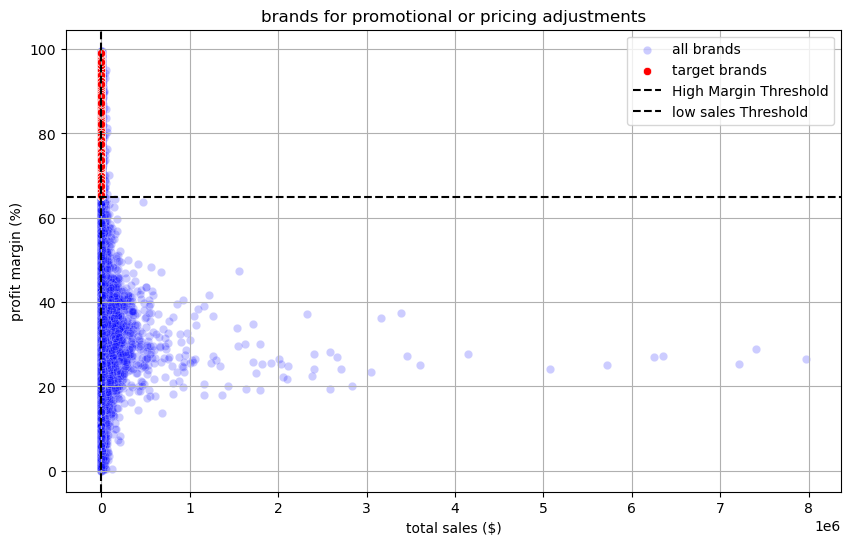

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance, x='totalSalesDollars', y='profitMargin',color="blue", label="all brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x='totalSalesDollars', y='profitMargin',color="red", label="target brands")

plt.axhline(high_profitMargin_threshold, linestyle='--', color="black", label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color="black", label="low sales Threshold")

plt.xlabel('total sales ($)')
plt.ylabel('profit margin (%)')
plt.title("brands for promotional or pricing adjustments")
plt.legend()
plt.grid(True)
plt.show()


which vendors and brands demonstrate the highest sales performance?

In [20]:
# top vendors and rbands by sales performance
top_vendors = df.groupby('vendorName')['totalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('description')['totalSalesDollars'].sum().nlargest(10)

In [22]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [23]:
top_vendors.apply(lambda x : format_dollars(x))

vendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: totalSalesDollars, dtype: object

In [24]:
top_brands.apply(lambda x : format_dollars(x))

description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: totalSalesDollars, dtype: object

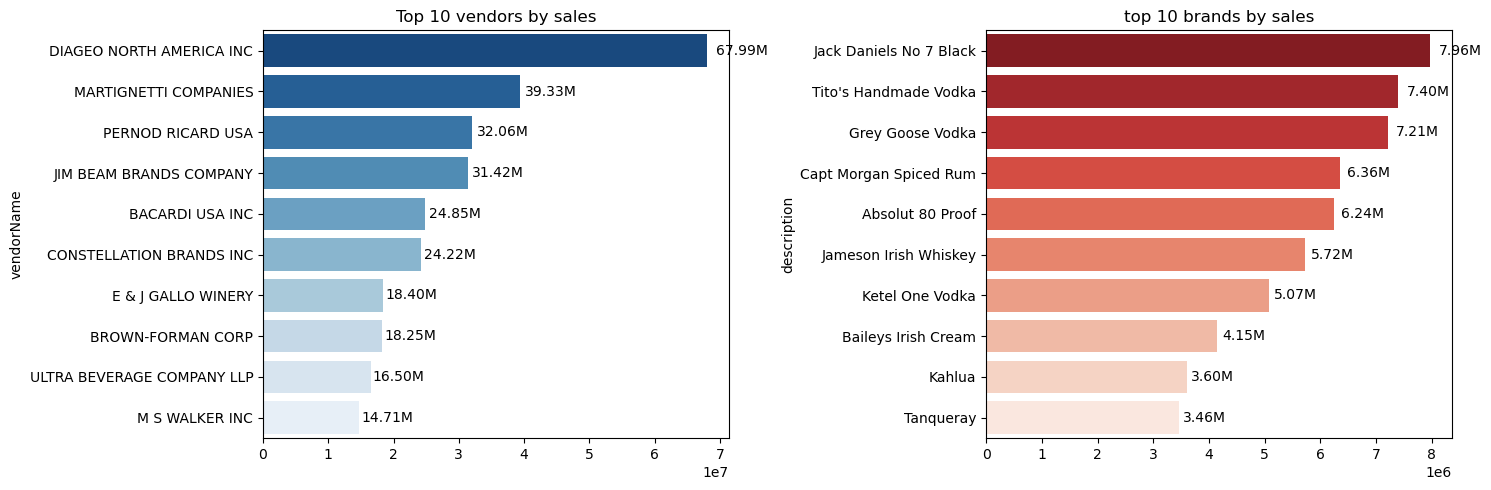

In [26]:
# using bar plot
plt.figure(figsize=(15,5))

#top vendors
plt.subplot(1,2,1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 vendors by sales")

for bar in ax1.patches:
    ax1.text(bar.get_width()+(bar.get_width() * 0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha="left", va="center", fontsize=10,color='black')

#top brands
plt.subplot(1,2,2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("top 10 brands by sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha="left", va="center", fontsize=10,color='black')
plt.tight_layout()
plt.show()

which vendors contribute the most to total purchase dollars?

In [28]:
vendor_performance = df.groupby('vendorName').agg({
    'totalPurchaseDollars':'sum',
    'grossProfit':'sum',
    'totalSalesDollars':'sum'
}).reset_index()

In [44]:
vendor_performance['purchaseContribution'] = vendor_performance['totalPurchaseDollars']/vendor_performance['totalPurchaseDollars'].sum()*100

In [45]:
vendor_performance = round(vendor_performance.sort_values('purchaseContribution', ascending = False),2)

In [46]:
top_vendors = vendor_performance.head(10)
top_vendors['totalSalesDollars'] = top_vendors['totalSalesDollars'].apply(format_dollars)
top_vendors['totalPurchaseDollars'] = top_vendors['totalPurchaseDollars'].apply(format_dollars)
top_vendors['grossProfit'] = top_vendors['grossProfit'].apply(format_dollars)

In [49]:
top_vendors['cumulative_contribution'] = top_vendors['purchaseContribution'].cumsum()
top_vendors

,vendorName,totalPurchaseDollars,grossProfit,totalSalesDollars,purchaseContribution,cummlative_contribution,cumulative_contribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69,65.69


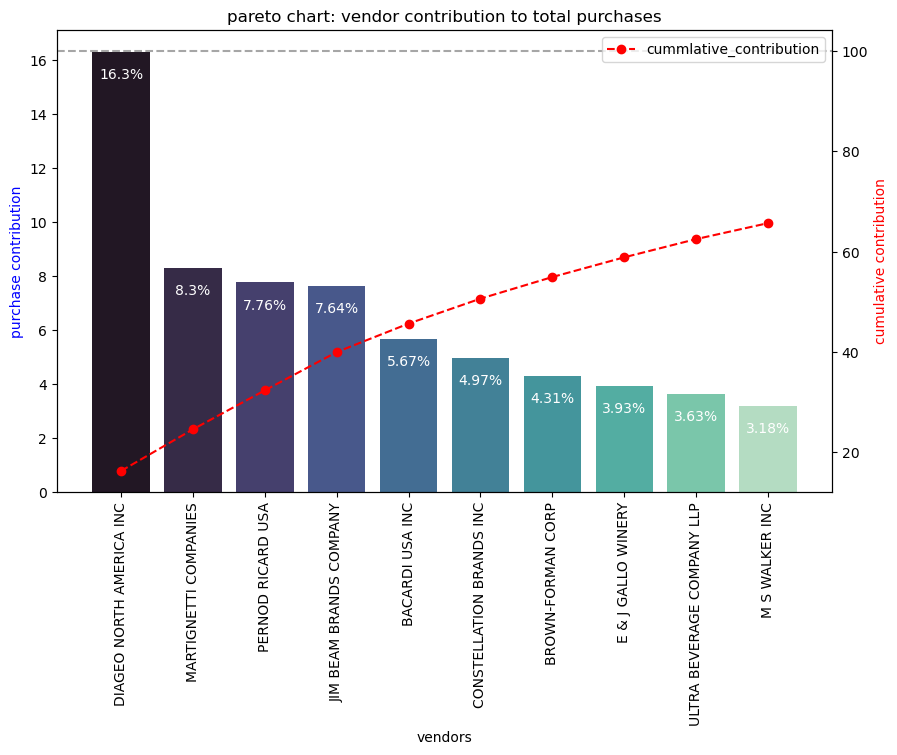

In [50]:


fig, ax1= plt.subplots(figsize=(10,6))

#bar plot for purchase contribution
sns.barplot(x=top_vendors['vendorName'], y=top_vendors['purchaseContribution'], palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['purchaseContribution']):
    ax1.text(i, value -1, str(value)+'%',ha='center',fontsize=10,color='white')


#line plot for cumulative contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['vendorName'],top_vendors['cumulative_contribution'], color='red',marker='o',linestyle='dashed',label='cummlative_contribution')

ax1.set_xticklabels(top_vendors['vendorName'], rotation=90)
ax1.set_ylabel('purchase contribution', color='blue')
ax2.set_ylabel('cumulative contribution', color='red')
ax1.set_xlabel('vendors')
ax1.set_title('pareto chart: vendor contribution to total purchases')

ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

how much of total procurement is dependent on the top vendors?

In [51]:
print(f"total purchase contribution of top 10 vendors is {round(top_vendors['purchaseContribution'].sum(),2)}")

total purchase contribution of top 10 vendors is 65.69


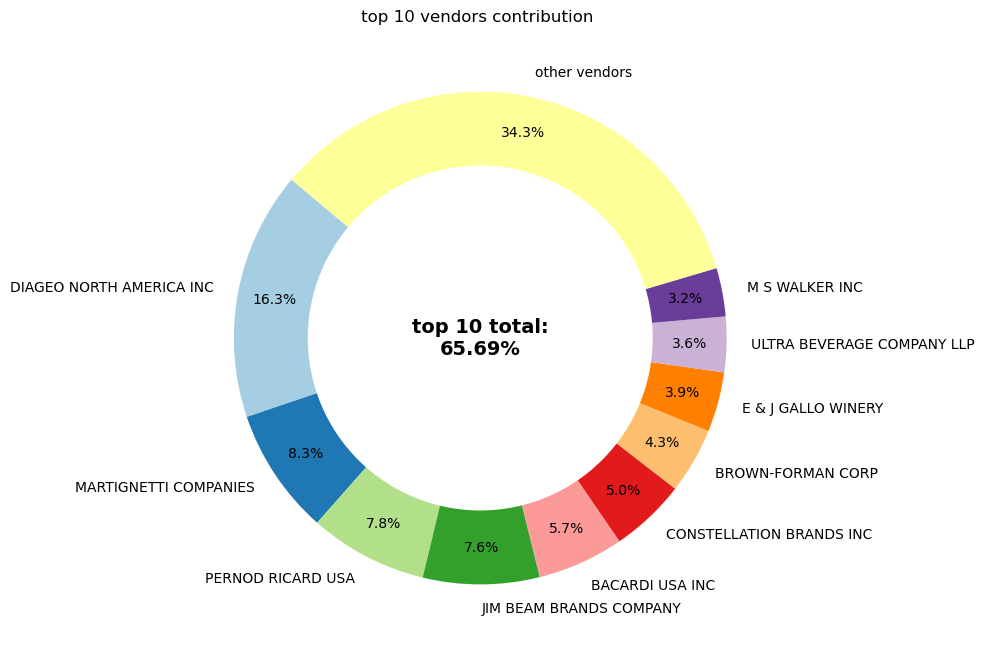

In [59]:
vendors = list(top_vendors['vendorName'].values)
purchase_contributions = list(top_vendors['purchaseContribution'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

#append other vendors category
vendors.append('other vendors')
purchase_contributions.append(remaining_contribution)

#donut chart
fig,ax=plt.subplots(figsize=(8,8))
wedges,texts,autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                               startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

#draw a white circle in the center to create a donut 
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

#add total contribution annotation in the centre
plt.text(0,0,f"top 10 total:\n{total_contribution:.2f}%", fontsize=14,fontweight='bold',ha='center',va='center')

plt.title("top 10 vendors contribution ")
plt.show()

does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?


In [60]:
df['unitPurchasePrice'] = df['totalPurchaseDollars'] / df['totalPurchaseQuantity']

In [61]:
df['orderSize'] = pd.qcut(df["totalPurchaseQuantity"], q=3, labels=["small","medium","large"])

In [62]:
df["orderSize"]

0       large
1       large
2       large
3       large
4       large
        ...  
8559    small
8560    small
8561    small
8562    small
8563    small
Name: orderSize, Length: 8564, dtype: category
Categories (3, object): ['small' < 'medium' < 'large']

In [64]:
df.groupby("orderSize")[['unitPurchasePrice']].mean()

,unitPurchasePrice
orderSize,
small,39.068186
medium,15.486414
large,10.777625


* vendors buying in bulk get lowest price , meaning higher margins if they can manage inventory efficiently
* the price difference between small and large orders is substantial (~74% reduction in unit cost)
* this suggest that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue

## which vendors have low inventory turnover, including excess stock and slow-moving products?

In [68]:
df[df['stockTurnover'] < 1].groupby('vendorName')[['stockTurnover']].mean().sort_values('stockTurnover',ascending = True).head(10)

,stockTurnover
vendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


## how much capital is locked in unsold inventory per vender and which vendors contribute the most to it?

In [72]:
df['unsoldInventoryValue'] = (df['totalPurchaseQuantity'] - df['totalSalesQuantity'])*df['purchasePrice']
print('total unsold capital:', format_dollars(df['unsoldInventoryValue'].sum()))

total unsold capital: 2.71M


In [73]:
#capital locked per vendor
inventory_value_per_vendor = df.groupby('vendorName')['unsoldInventoryValue'].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='unsoldInventoryValue', ascending = False)
inventory_value_per_vendor['unsoldInventoryValue'] = inventory_value_per_vendor['unsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,vendorName,unsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


## what is the 95% confidence intervals for profit margin of top performing and low performing vendors

In [74]:
top_threshold = df['totalSalesDollars'].quantile(0.75)
low_threshold = df['totalSalesDollars'].quantile(0.25)

In [81]:
top_vendors = df[df['totalSalesDollars'] >= top_threshold]['profitMargin']
low_vendors = df[df['totalSalesDollars'] <= low_threshold]['profitMargin']

In [83]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: profitMargin, Length: 2141, dtype: float64

In [84]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof =1)/np.sqrt(len(data))
    t_critical = stats.t.ppf((1+confidence)/2,df=len(data)-1)
    margin_of_error = t_critical*std_err
    return mean_val,mean_val-margin_of_error, mean_val + margin_of_error

top vendors 95% CI: (30.74,31.61), mean:31.18
low vendors 95% CI: (40.50,42.64), mean:41.57


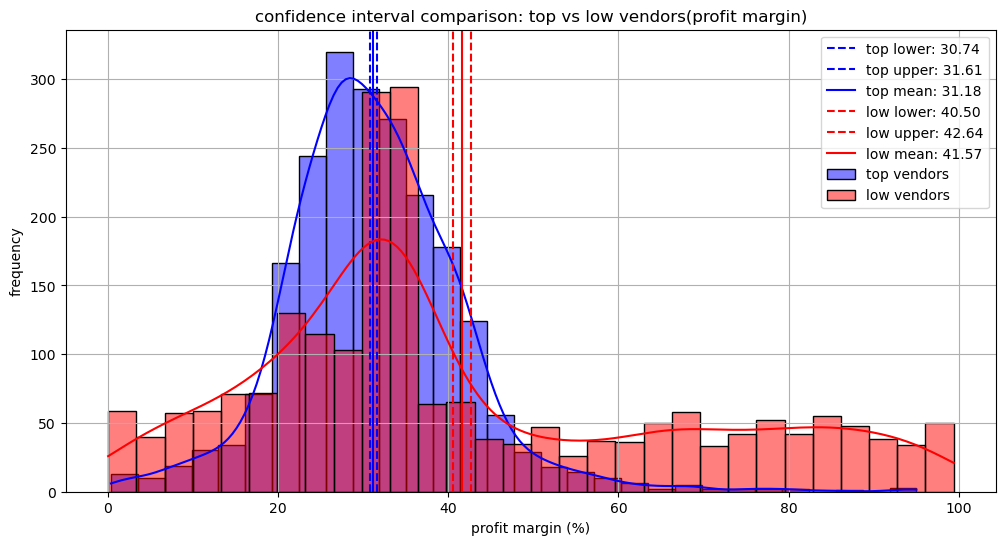

In [86]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"top vendors 95% CI: ({top_lower:.2f},{top_upper:.2f}), mean:{top_mean:.2f}")
print(f"low vendors 95% CI: ({low_lower:.2f},{low_upper:.2f}), mean:{low_mean:.2f}")

plt.figure(figsize=(12,6))

#top vendors plot
sns.histplot(top_vendors,kde=True,color='blue',bins=30,alpha=0.5,label='top vendors')
plt.axvline(top_lower,color='blue',linestyle='--',label=f"top lower: {top_lower:.2f}")
plt.axvline(top_upper,color='blue',linestyle='--',label=f"top upper: {top_upper:.2f}")
plt.axvline(top_mean,color='blue',linestyle='-',label=f"top mean: {top_mean:.2f}")

#low vendors plot
sns.histplot(low_vendors,kde=True,color='red',bins=30,alpha=0.5,label='low vendors')
plt.axvline(low_lower,color='red',linestyle='--',label=f"low lower: {low_lower:.2f}")
plt.axvline(low_upper,color='red',linestyle='--',label=f"low upper: {low_upper:.2f}")
plt.axvline(low_mean,color='red',linestyle='-',label=f"low mean: {low_mean:.2f}")

plt.title("confidence interval comparison: top vs low vendors(profit margin)")
plt.xlabel("profit margin (%)")
plt.ylabel("frequency")
plt.legend()
plt.grid(True)
plt.show()

* the confidence interval for low performing vendors(41.57) is significantly higher that than of the top performing vendors(31.18)
* this suggest that vendors with lower sales tend to maintain higher profit margins potentially due to premium pricing or lower operational costs
* for high performing vendors: if they aim to improve profitability, they could explore selective price adjustments, cost optimization or bundle strategies
* for low performing vendors: despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing or improved ditribution strategies

purchasePrice has week correlation with totalSalesDollar and grossProfit, suggesting that price variation do not significantly impact sales revenue or profit

strong correlation between total purchase quantity and total sales quantity, confirming efficient inventory turnover

-ve correlation between profit margin and total sales price meaning when sales price increases, margin decrease, possible due to competitive pricing pressure 

stockTurnover has weak -ve correlation with both grossProfit and profitmargin. meaning fast turnover doesnt mean high profitability